#### ( 1 )  Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)

#### K-Means Algorithm

##### K-Means is an unsupervised learning algorithm used to partition data into K clusters, such that:

    - Each data point belongs to the cluster with the nearest mean (centroid).

    - The goal is to minimize the within-cluster sum of squares (WCSS).

#### Elbow Method

##### The Elbow Method helps determine the optimal number of clusters (K).
We plot the WCSS for various values of K and look for a point (“elbow”) where the decrease in WCSS slows down.

In [53]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, Birch
import scipy.cluster.hierarchy as sch

#### Load the dataset

In [55]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

#### Standardize the data

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Use the Elbow Method to find optimal K

In [57]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#### Visualize the generated data

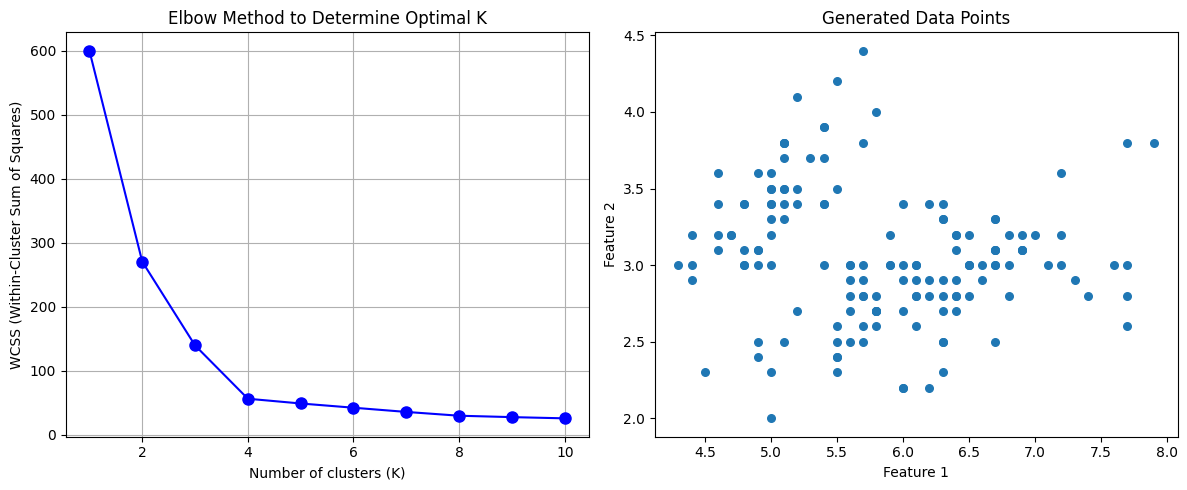

In [110]:
plt.figure(figsize=(12, 5))

# --- Elbow Method ---
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-', markersize=8)
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)

# --- Generated Data Points ---
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Data Points")     
plt.xlabel("Feature 1")                 
plt.ylabel("Feature 2")                 

plt.tight_layout()
plt.show()


#### Apply K-Means with optimal K (say K=3 from elbow)

In [60]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

#### Add cluster labels to the dataframe

In [61]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Cluster'] = y_kmeans
print(df.head())

   Feature_1  Feature_2  Cluster
0   0.836857   2.136359        1
1  -1.413658   7.409623        0
2   1.155213   5.099619        1
3  -1.018616   7.814915        0
4   1.271351   1.892542        1


#### Visualize the clusters (only first 2 features for simplicity)

#### Plot centroids

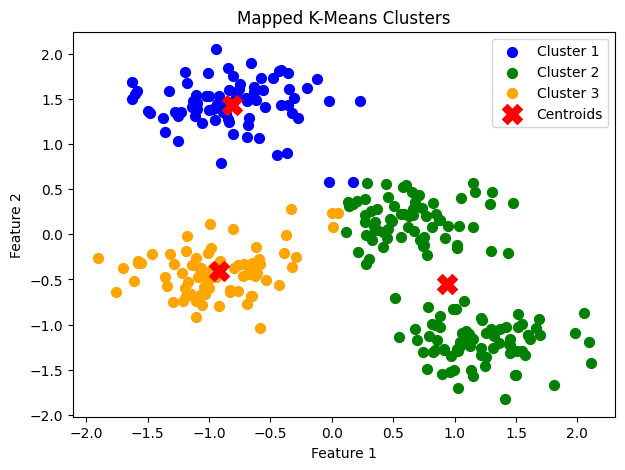

In [62]:
plt.figure(figsize=(7, 5))

# Cluster 1
plt.scatter(
    X_scaled[y_kmeans == 0, 0],
    X_scaled[y_kmeans == 0, 1],
    s=50, c='blue', label='Cluster 1'
)

# Cluster 2
plt.scatter(
    X_scaled[y_kmeans == 1, 0],
    X_scaled[y_kmeans == 1, 1],
    s=50, c='green', label='Cluster 2'
)

# Cluster 3
plt.scatter(
    X_scaled[y_kmeans == 2, 0],
    X_scaled[y_kmeans == 2, 1],
    s=50, c='orange', label='Cluster 3'
)

# Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)

# Titles and labels
plt.title("Mapped K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### ( 2 ) Implement all the clustering distance measures (similarity measures)

#### i. Euclidean distance 

In [63]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

#### ii. Manhattan distance

In [64]:
def manhattan_distance(p, q):
    return np.sum(np.abs(p - q))

#### iii. cosine similarity 

In [65]:
def cosine_similarity(p, q):
    dot_product = np.dot(p, q)
    norm_p = np.linalg.norm(p)
    norm_q = np.linalg.norm(q)
    return dot_product / (norm_p * norm_q)

def cosine_distance(p, q):
    return 1 - cosine_similarity(p, q)

#### iv. minkowski 

In [66]:
def minkowski_distance(p, q, p_value=3):
    return np.sum(np.abs(p - q) ** p_value) ** (1 / p_value)

#### v. jaccard index

In [67]:
def jaccard_index(p, q):
    intersection = np.sum(np.minimum(p, q))
    union = np.sum(np.maximum(p, q))
    return intersection / union

def jaccard_distance(p, q):
    return 1 - jaccard_index(p, q)

#### load dataset

In [68]:
iris = load_iris()
X = iris.data
y = iris.target

# Normalize data for cosine & Minkowski
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### Distance Between First Two Points

In [69]:
p = X_scaled[0]
q = X_scaled[1]

In [70]:
print("Euclidean Distance:", euclidean_distance(p, q))
print("Manhattan Distance:", manhattan_distance(p, q))
print("Cosine Distance:", cosine_distance(p, q))
print("Minkowski Distance (p=3):", minkowski_distance(p, q, 3))
print("Jaccard Distance (binary):", jaccard_distance((p > 0.5).astype(int), (q > 0.5).astype(int)))

Euclidean Distance: 0.21561353744805578
Manhattan Distance: 0.2638888888888886
Cosine Distance: 0.0023127341800639467
Minkowski Distance (p=3): 0.20964196842602079
Jaccard Distance (binary): 1.0


#### Pairwise Distance Matrix Example

In [71]:
num_points = len(X_scaled)
euclidean_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        euclidean_matrix[i, j] = euclidean_distance(X_scaled[i], X_scaled[j])

print("\nEuclidean Distance Matrix Shape:", euclidean_matrix.shape)
print(euclidean_matrix[:5, :5])  # Show a small portion


Euclidean Distance Matrix Shape: (150, 150)
[[0.         0.21561354 0.16810102 0.21761244 0.0500771 ]
 [0.21561354 0.         0.10157824 0.09469862 0.25153848]
 [0.16810102 0.10157824 0.         0.06047157 0.18710825]
 [0.21761244 0.09469862 0.06047157 0.         0.23671867]
 [0.0500771  0.25153848 0.18710825 0.23671867 0.        ]]


### ( 3 ) Implement hierarchical clustering
I. agglomerative (BIRCH and CHAMELEON) 
ii. Divisive 

In [72]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### I. Agglomerative Clustering

#### ( a ) Basic Agglomerative Clustering

In [73]:
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_agglo = agglo.fit_predict(X_scaled)

print("Agglomerative Clustering labels:", labels_agglo)

Agglomerative Clustering labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


#### ( b ) BIRCH Clustering

In [74]:
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X_scaled)

print("BIRCH Clustering labels:", labels_birch)

BIRCH Clustering labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### ( c ) CHAMELEON Clustering

In [79]:
chameleon_like = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_chameleon = chameleon_like.fit_predict(X_scaled)

print(labels_chameleon)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#### Comparison scatter plot of clustering results

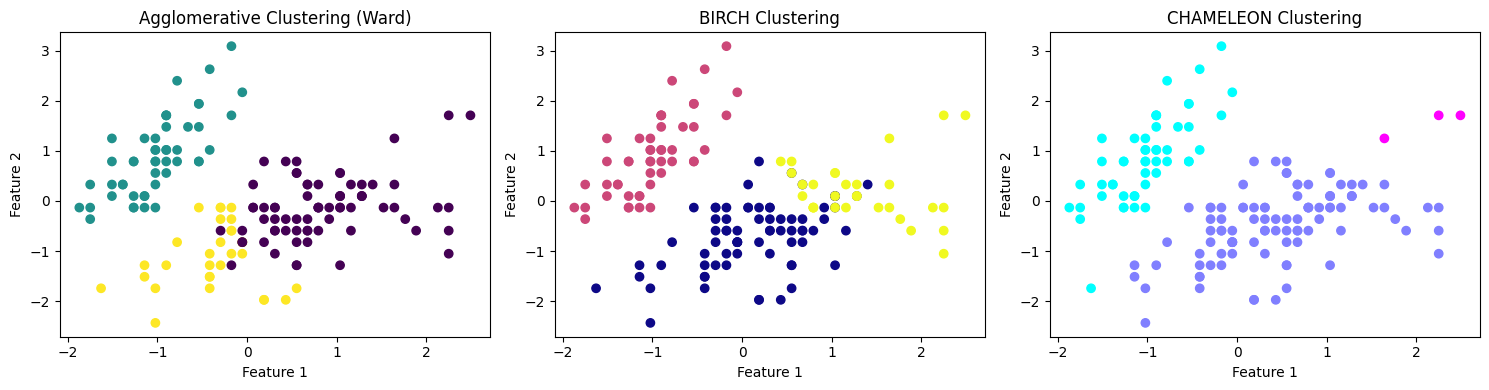

In [80]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agglo, cmap='viridis')
plt.title("Agglomerative Clustering (Ward)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_birch, cmap='plasma')
plt.title("BIRCH Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_chameleon, cmap='cool')
plt.title("CHAMELEON Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

#### ( II ) Divisive hierarchical clustering

In [86]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
iris = load_iris()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
linkage_matrix = sch.linkage(X_scaled, method='ward')  

labels_divisive = fcluster(linkage_matrix, t=3, criterion='maxclust')

#### Plot

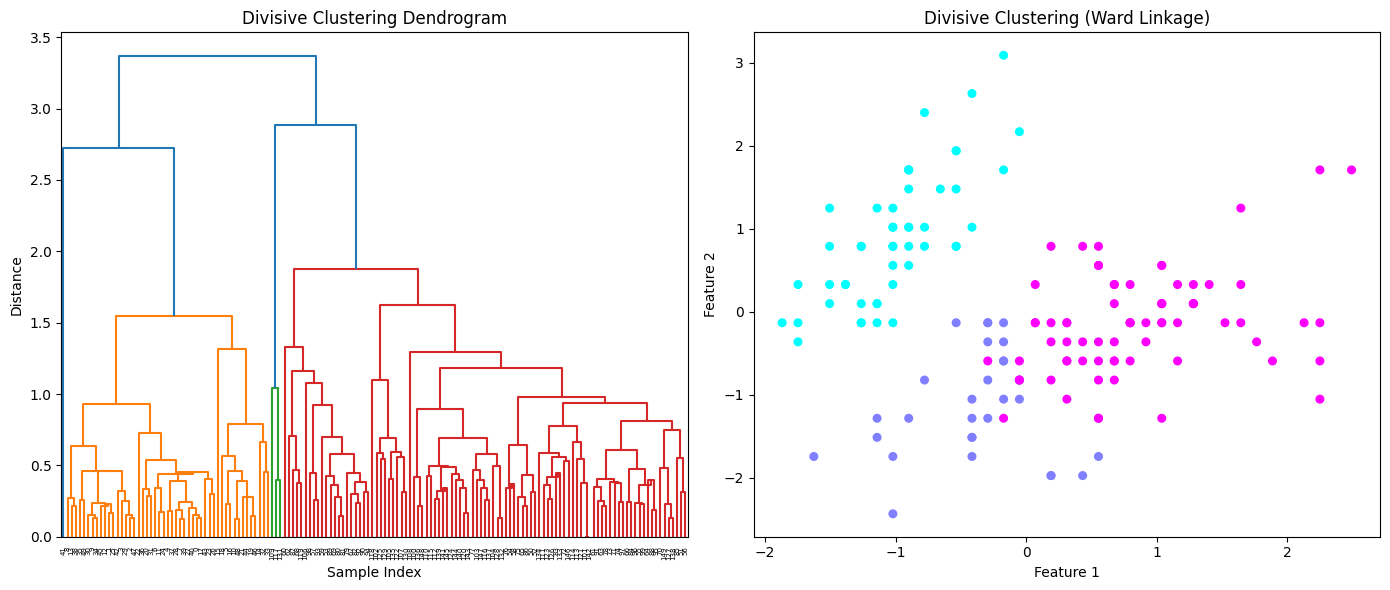

In [111]:
plt.figure(figsize=(14, 6))

# --- Dendrogram ---
plt.subplot(1, 2, 1)
sch.dendrogram(linkage_matrix)
plt.title("Divisive Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# --- Divisive Clustering Scatter Plot ---
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_divisive, cmap='cool', s=30)
plt.title("Divisive Clustering (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


#### Implement Types of Linkages 
    - Single Linkage
    - Complete Linkage
    - Average Linkage
    - Ward's Linkage
    - Centroid-Linkage

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Linkage Types

In [93]:
linkages = ['single', 'complete', 'average', 'ward', 'centroid']
linkage_results = {}

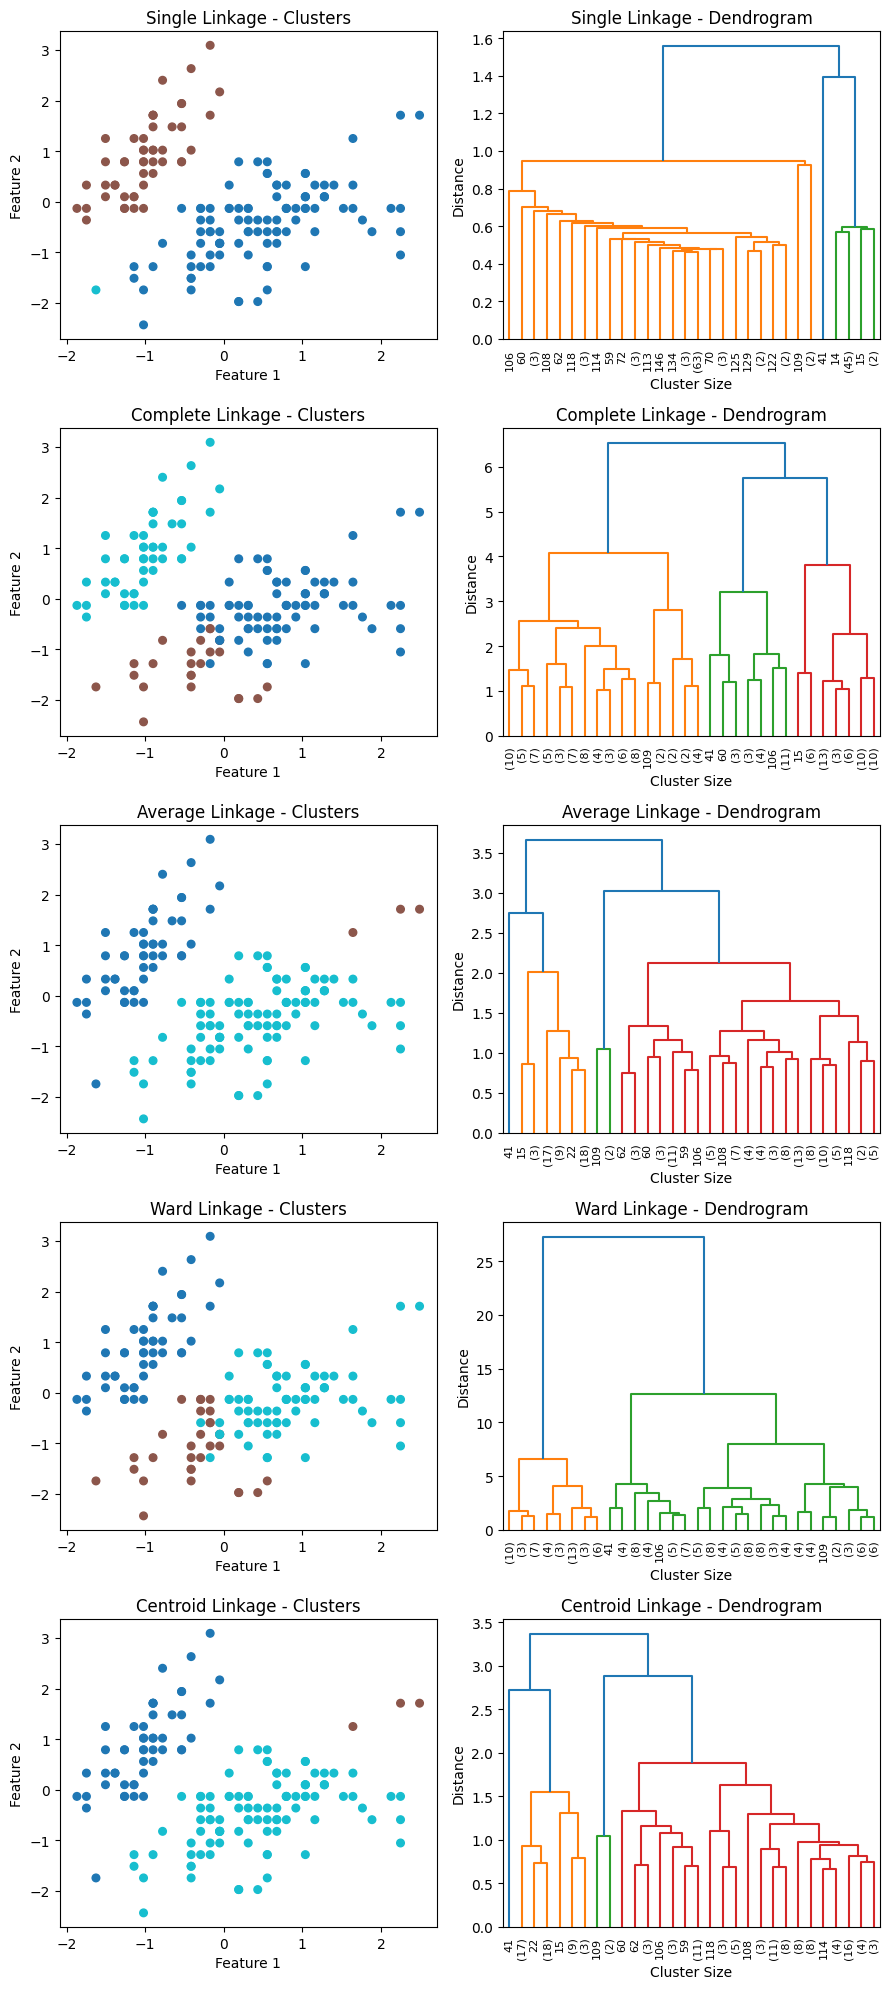

In [115]:

plt.figure(figsize=(9, 20))

for i, linkage_method in enumerate(linkages):
    # Generate linkage matrix
    linkage_matrix = sch.linkage(X_scaled, method=linkage_method)

    # Get cluster labels
    labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

    # ===================== Scatter Plot =====================
    plt.subplot(len(linkages), 2, 2*i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(f"{linkage_method.capitalize()} Linkage - Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # ===================== Dendrogram =====================
    plt.subplot(len(linkages), 2, 2*i + 2)
    sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=8)
    plt.title(f"{linkage_method.capitalize()} Linkage - Dendrogram")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

#### Implement DBSCAN clustering

In [101]:
from sklearn.cluster import DBSCAN, SpectralClustering

In [103]:
iris = load_iris()
X = iris.data
y = iris.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [104]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune eps and min_samples
labels_dbscan = dbscan.fit_predict(X_scaled)

print("DBSCAN Labels:", np.unique(labels_dbscan))

DBSCAN Labels: [-1  0  1]


#### Implement Spectral Clustering

In [105]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)

print("Spectral Clustering Labels:", np.unique(labels_spectral))


Spectral Clustering Labels: [0 1 2]


#### Visualization of Both Methods

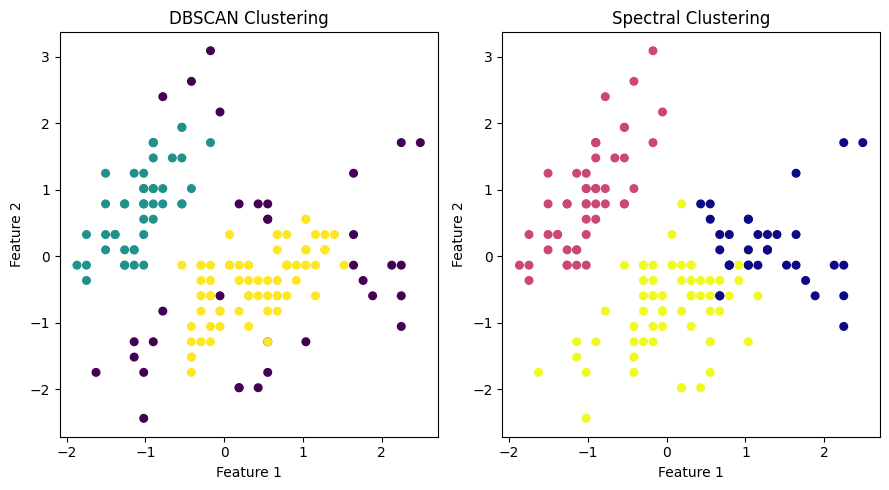

In [116]:
plt.figure(figsize=(9, 5))

# DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spectral, cmap='plasma', s=30)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
